## Convolutional Neural Network for handwritten digit classification using tensorflow and MNIST dataset

       MNIST Dataset is a collection of 60000 handwritten train datasets and 10000 test sets.Each Image is of size 28*28 
       pixels.Here convolutional neural network is used to find the handwritten digits       

### Importing the required libraries 

In [1]:
import tensorflow as tf
sess=tf.InteractiveSession()

### Getting the MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


At labelling we have integers but if we use integers as such the neural net might get trained as a way that 5 has more weightage than 2 to avoid this I am using One_Hot encoding here we get it as binary codes(of length 4)


### Since size of image is known initalising few parameters

In [3]:
width=28
height=28
flat=width*height
#There are 10 classes to classify
classes=10 

### Creating input and output tensors

In [4]:
x= tf.placeholder(tf.float32, shape=[None, flat])
y= tf.placeholder(tf.float32, shape=[None, classes])

Reshaping

In [5]:
x_image=tf.reshape(x,[-1,28,28,1])

## Layer one of convolutional neural network
#### Defining kernal(Gaussian) its weights and bias
Size of the filter(kernal) is 5x5 for each image 32 different features are there so a tensor of 5x5x32 is created for filter and applied to image of size 28x28.Output of the layer is 28x28x32

In [6]:
w_conv1=tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1=tf.Variable(tf.constant(0.1, shape=[32]))

## Convolution
To convolution in 2D given 4D variables tf.nn.conv2d can be used.

In [7]:
con1=tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

### Applying Relu activation function 
Relu function is given by y=max(x,0) here this function is initialised and is run when the session is called

In [8]:
hcon1=tf.nn.relu(con1)

### Max pooling
It is a form of non linear down sampling.It choses rectangles from a given image and gives maximum value of a rectangle

In [9]:
c1=tf.nn.max_pool(hcon1, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
c1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

Layer one is completed similarly layer 2 is also done as shown below

### 2nd Layer:
- Kernal size=5x5 :
- Feature from layer 1=32: 
- Output from layer one is 14x14x32:
Here if 64 features are required then weights and bias is given as below

In [10]:
w_conv2=tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2=tf.Variable(tf.constant(0.1, shape=[64]))

In [11]:
#Convolving
con2=tf.nn.conv2d(c1, w_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2


In [12]:
#Relu
hcon2=tf.nn.relu(con2)
#Max pooling
c2=tf.nn.max_pool(hcon2, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
c2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

### Fully connected layer
Each of these 7x7 matrix is rechaped into 49x1 matrix 64 such matrix are there for an image so 49x64 ie..3136x1 matrix will be there And third layer will be of size 1024x1 so weights between these 2 layers is [3136x1024]

In [13]:
#Flatenning 2nd layer
flat2=tf.reshape(c2,[-1,7*7*64])

In [14]:
# Weights and biases between layer 2 and layer 3
w_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) 

Matrix multiplication of weights and adding biases

In [15]:
fl=tf.matmul(flat2,w_fc1)+b_fc1

### Applying relu for 3rd layer

In [16]:
h_fc1=tf.nn.relu(fl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

### Droupout layer to avoid overfitting

In [17]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

### Softmax Layer
There are 1024 features ad 10 classification labels.So here softmax is used to find the probabilities of each output
Weights and biases for this layer

In [18]:
w_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) 
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) 

In [19]:
#Applying weights and biases
fc=tf.matmul(layer_drop,w_fc2)+b_fc2

### Applying softmax 

In [20]:
Y=tf.nn.softmax(fc)
Y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

# Defining functions and train the model
Cross Entropy is used to find the error propabilities 

In [21]:
C_E=tf.reduce_mean(-tf.reduce_sum(y * tf.log(Y), reduction_indices=[1]))

### Optimiser
It is essential to reduce error with respect to weights and biases.So gradient decent is used

In [22]:
train_step=tf.train.AdamOptimizer(1e-4).minimize(C_E)

In [23]:
#Defining Correct predictions
c_p=tf.equal(tf.argmax(Y,1), tf.argmax(y,1))


### Defining accuracy

In [24]:
accuracy=tf.reduce_mean(tf.cast(c_p, tf.float32))

## Running session and to train
### Here I have traines for 1000 images it can be increase

In [25]:
sess.run(tf.global_variables_initializer())

In [26]:
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
    train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.08
step 100, training accuracy 0.78
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.92
step 500, training accuracy 0.88
step 600, training accuracy 0.98
step 700, training accuracy 0.96
step 800, training accuracy 0.9
step 900, training accuracy 0.98


### Evaluation

In [27]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9643


## Visual

In [45]:
filters=sess.run(tf.reshape(tf.transpose(w_conv1, perm=[2, 3, 0,1]),[32,-1]))
filters.shape


(32, 25)

### below cell has a function title raster images that converts 32x25 array into 32x25 
ignore below cell

In [46]:
import numpy


def scale_to_unit_interval(ndar, eps=1e-8):
    """ Scales all values in the ndarray ndar to be between 0 and 1 """
    ndar = ndar.copy()
    ndar -= ndar.min()
    ndar *= 1.0 / (ndar.max() + eps)
    return ndar


def tile_raster_images(X, img_shape, tile_shape, tile_spacing=(0, 0),
                       scale_rows_to_unit_interval=True,
                       output_pixel_vals=True):

    assert len(img_shape) == 2
    assert len(tile_shape) == 2
    assert len(tile_spacing) == 2

    out_shape = [
        (ishp + tsp) * tshp - tsp
        for ishp, tshp, tsp in zip(img_shape, tile_shape, tile_spacing)
    ]

    if isinstance(X, tuple):
        assert len(X) == 4
        # Create an output numpy ndarray to store the image
        if output_pixel_vals:
            out_array = numpy.zeros((out_shape[0], out_shape[1], 4),
                                    dtype='uint8')
        else:
            out_array = numpy.zeros((out_shape[0], out_shape[1], 4),
                                    dtype=X.dtype)

        #colors default to 0, alpha defaults to 1 (opaque)
        if output_pixel_vals:
            channel_defaults = [0, 0, 0, 255]
        else:
            channel_defaults = [0., 0., 0., 1.]

        for i in range(4):
            if X[i] is None:
                # if channel is None, fill it with zeros of the correct
                # dtype
                dt = out_array.dtype
                if output_pixel_vals:
                    dt = 'uint8'
                out_array[:, :, i] = numpy.zeros(
                    out_shape,
                    dtype=dt
                ) + channel_defaults[i]
            else:
                # use a recurrent call to compute the channel and store it
                # in the output
                out_array[:, :, i] = tile_raster_images(
                    X[i], img_shape, tile_shape, tile_spacing,
                    scale_rows_to_unit_interval, output_pixel_vals)
        return out_array

    else:
        # if we are dealing with only one channel
        H, W = img_shape
        Hs, Ws = tile_spacing

        # generate a matrix to store the output
        dt = X.dtype
        if output_pixel_vals:
            dt = 'uint8'
        out_array = numpy.zeros(out_shape, dtype=dt)

        for tile_row in range(tile_shape[0]):
            for tile_col in range(tile_shape[1]):
                if tile_row * tile_shape[1] + tile_col < X.shape[0]:
                    this_x = X[tile_row * tile_shape[1] + tile_col]
                    if scale_rows_to_unit_interval:
                        # if we should scale values to be between 0 and 1
                        # do this by calling the `scale_to_unit_interval`
                        # function
                        this_img = scale_to_unit_interval(
                            this_x.reshape(img_shape))
                    else:
                        this_img = this_x.reshape(img_shape)
                    # add the slice to the corresponding position in the
                    # output array
                    c = 1
                    if output_pixel_vals:
                        c = 255
                    out_array[
                        tile_row * (H + Hs): tile_row * (H + Hs) + H,
                        tile_col * (W + Ws): tile_col * (W + Ws) + W
                    ] = this_img * c
        return out_array

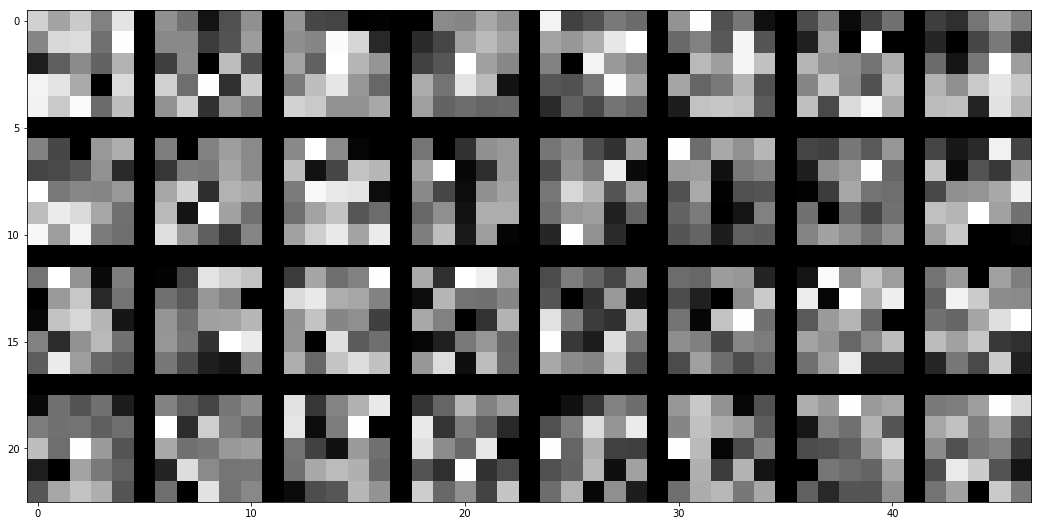

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(filters, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')   

### Image Passing through first layer

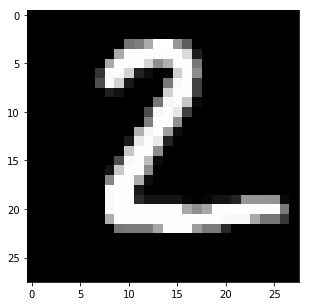

In [52]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

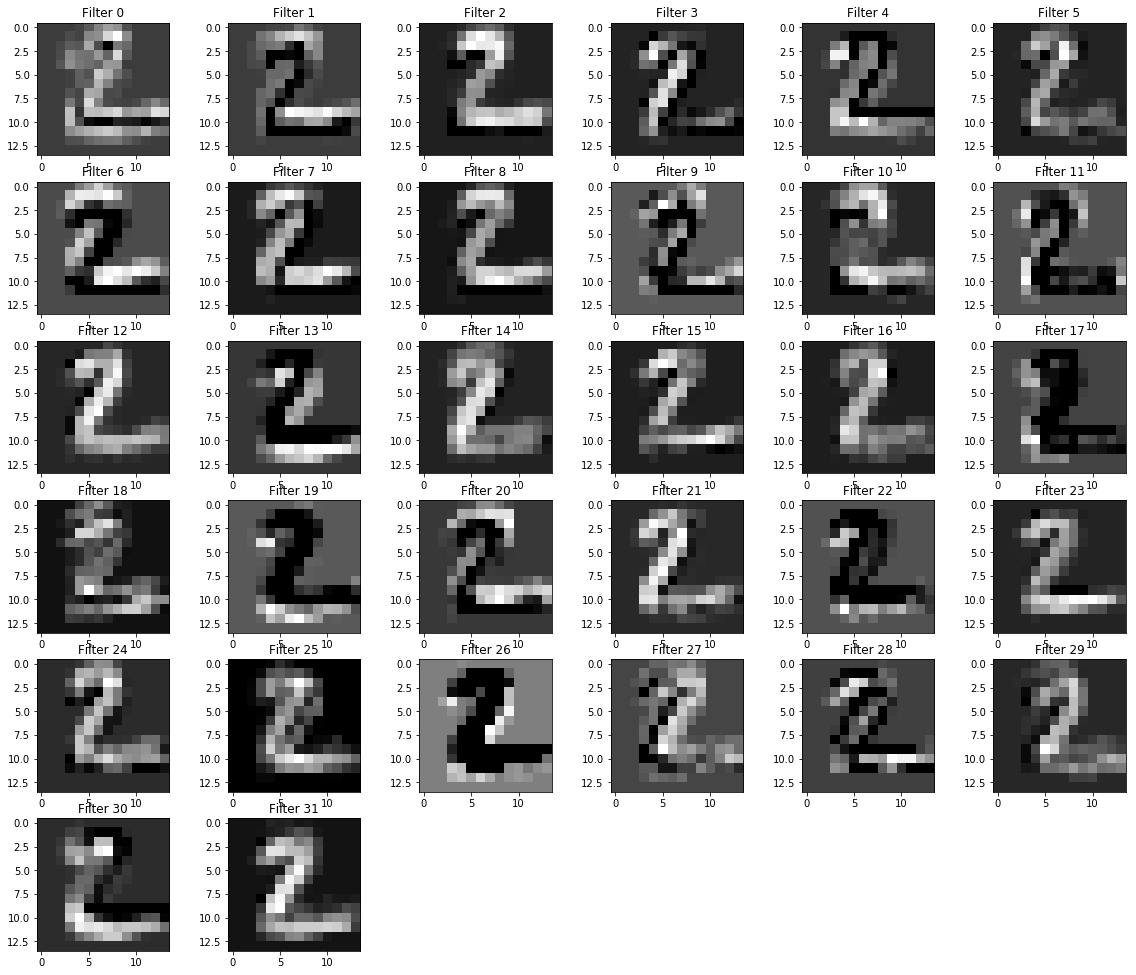

In [54]:
ActivatedUnits = sess.run(c1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

### Second Layer

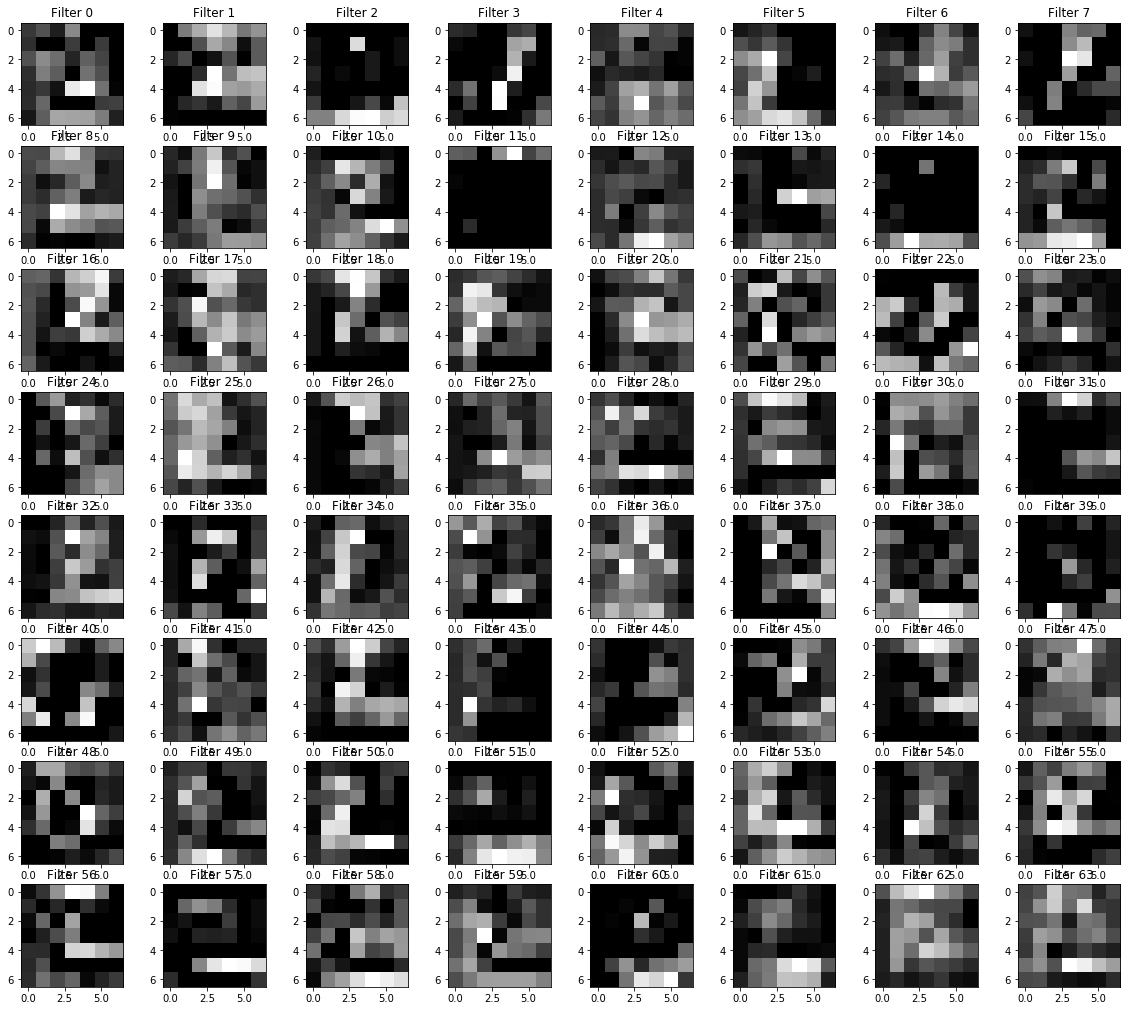

In [55]:
ActivatedUnits = sess.run(c2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")